In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_excel('Dataset.xlsx',parse_dates=['timestamp'])
marco = pd.read_csv('macro.csv',parse_dates=['timestamp'],low_memory=False)

In [4]:
raw_data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
marco.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1/1/2010,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,1/2/2010,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,1/3/2010,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,1/4/2010,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,1/5/2010,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [6]:
print(raw_data.timestamp.isnull().sum())
print(marco.timestamp.isnull().sum())

0
0


In [7]:
print(raw_data['timestamp'].dtype)
print(marco['timestamp'].dtype)

datetime64[ns]
object


In [8]:
marco.timestamp.unique()
#


array(['1/1/2010', '1/2/2010', '1/3/2010', ..., '10/18/2016',
       '10/19/2016', '50.2'], dtype=object)

In [4]:
marco.drop(marco.loc[marco.timestamp == '50.2'].index,inplace=True)

In [5]:
marco['timestamp']=pd.to_datetime(marco['timestamp'],dayfirst=True)

In [6]:
data = pd.merge(raw_data,marco, on='timestamp')

In [12]:
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


In [13]:
# data.to_csv('merged_data.csv')

In [14]:
# report = data.profile_report(title='Pandas Profiling before Data Preprocessing')
# report.to_file(output_file="data_before_preprocessing.html")

In [15]:
data.shape       # Shape of Data

(30471, 391)

In [16]:
#data.drop('id',axis=1,inplace=True)

In [17]:
data_dtype = data.dtypes.reset_index()
data_dtype.columns = ['Count', 'Column Type']
data_dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,157
1,datetime64[ns],1
2,float64,215
3,object,18


###### There are 18 Object Feature in the data set

In [18]:
cat_fea = list(data.select_dtypes(include=['object']))
cat_fea

['product_type',
 'sub_area',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology',
 'child_on_acc_pre_school',
 'modern_education_share',
 'old_education_build_share']

In [19]:
for i in cat_fea:
    print(data[i].unique(),i,'\n')

['Investment' 'OwnerOccupier'] product_type 

['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' "Sokol'niki" 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'Obruchevskoe' 'Filevskij Park'
 'Troparevo-Nikulino' 'Severnoe Butovo' 'Hamovniki' 'Solncevo'
 'Dorogomilo

In [20]:
data.isnull().sum().sum()

504560

In [21]:
null_values_per = data.isnull().sum() * 100/ len(data)
missing_values = pd.DataFrame({
                                'Columns Name' : data.columns,
                                'Null Value Percentage' : null_values_per})

In [22]:
missing_values.sort_values('Null Value Percentage',ascending=False,inplace = True)


In [23]:
missing_values_new = missing_values[missing_values['Null Value Percentage']>0]
missing_values_new

,Columns Name,Null Value Percentage
provision_retail_space_modern_sqm,provision_retail_space_modern_sqm,97.528798
provision_retail_space_sqm,provision_retail_space_sqm,81.648124
load_of_teachers_preschool_per_teacher,load_of_teachers_preschool_per_teacher,55.465853
theaters_viewers_per_1000_cap,theaters_viewers_per_1000_cap,55.465853
museum_visitis_per_100_cap,museum_visitis_per_100_cap,55.465853
...,...,...
metro_min_walk,metro_min_walk,0.082045
metro_km_walk,metro_km_walk,0.082045
ID_railroad_station_walk,ID_railroad_station_walk,0.082045
railroad_station_walk_min,railroad_station_walk_min,0.082045


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

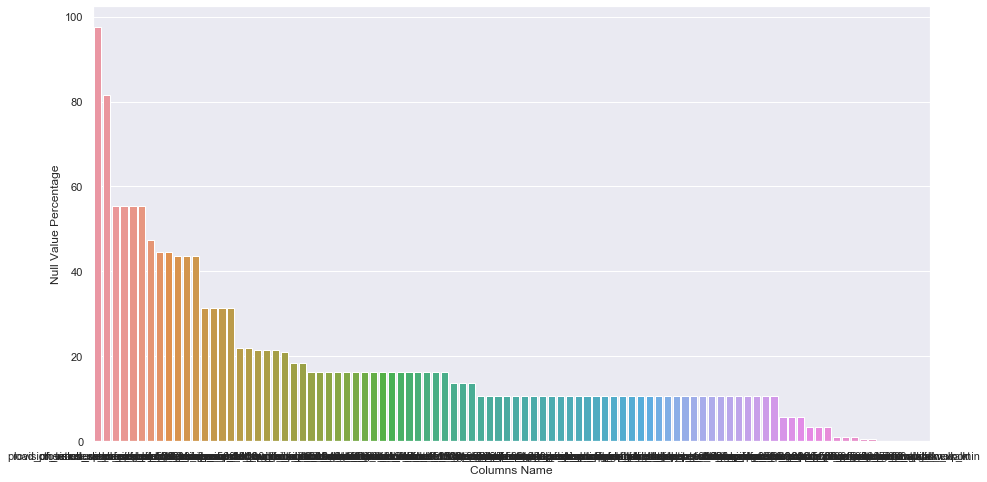

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='Columns Name', y='Null Value Percentage', data=missing_values_new)
plt.xticks()

In [25]:
na_col = data.columns[data.isna().any()].tolist()
na_col

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

In [26]:
len(na_col)

94

In [27]:
len(na_col) * 100/ len(data.columns)

24.04092071611253

##### Total 24 % data have null Values

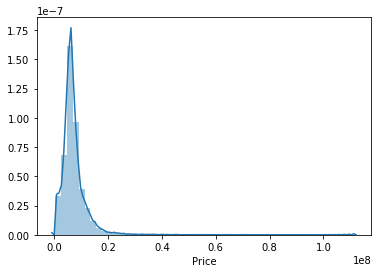

In [7]:
X = sns.distplot(data["price_doc"])
X.set_xlabel('Price')
plt.show()

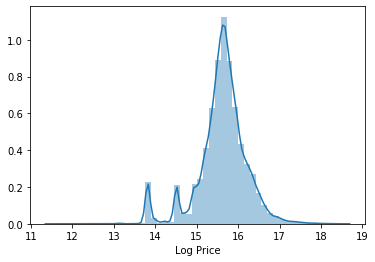

In [8]:
X = sns.distplot(np.log(data["price_doc"]))
X.set_xlabel('Log Price')
plt.show()

In [30]:
# new feature from Timestamp
data["month"] = data["timestamp"].dt.month
data["year"] = data["timestamp"].dt.year

In [31]:
#data.loc[:,['month','year']]

In [32]:
# Group by floor and mean of price of floor
floor_price = data.groupby("floor")["price_doc"].mean().reset_index()

In [33]:
floor_price.head()


,floor,price_doc
0,0.0,7.445459e+06
1,1.0,5.739380e+06
2,2.0,6.723365e+06
3,3.0,6.844884e+06
4,4.0,6.960809e+06


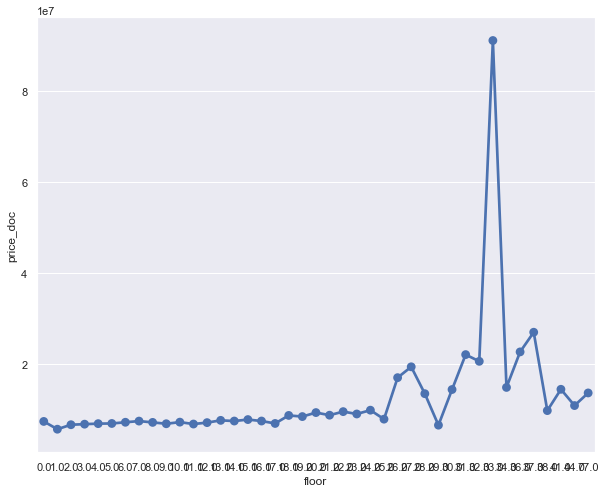

In [34]:
plt.figure(figsize= (10,8))
sns.pointplot(x = floor_price.floor, y= floor_price.price_doc)
plt.show()

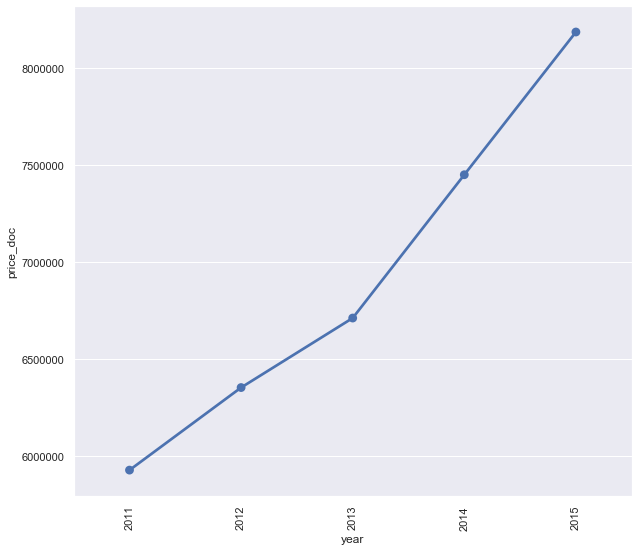

In [35]:
floor_price_month = data.groupby(["year"])["price_doc"].mean().reset_index()
plt.figure(figsize= (10,9))
sns.pointplot(x = floor_price_month.year, y= floor_price_month.price_doc)
plt.xticks(rotation = 90)
plt.show()

We have see that there is inscrese of price in every year

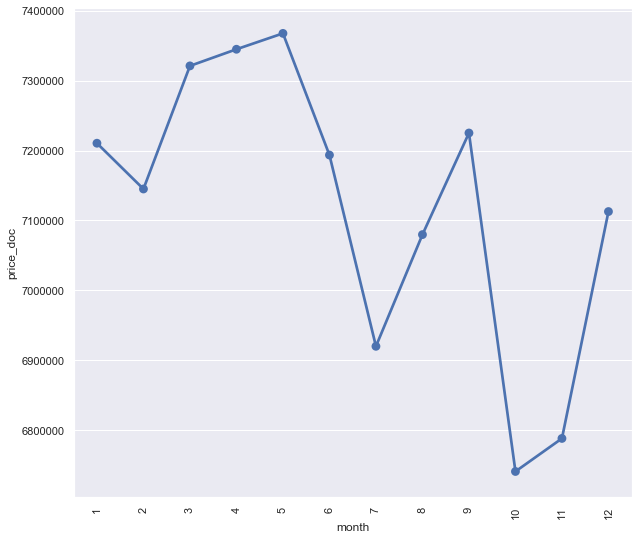

In [36]:
floor_price_month = data.groupby(["month"])["price_doc"].mean().reset_index()
plt.figure(figsize= (10,9))
sns.pointplot(x = floor_price_month.month, y= floor_price_month.price_doc)
plt.xticks(rotation = 90)
plt.show()

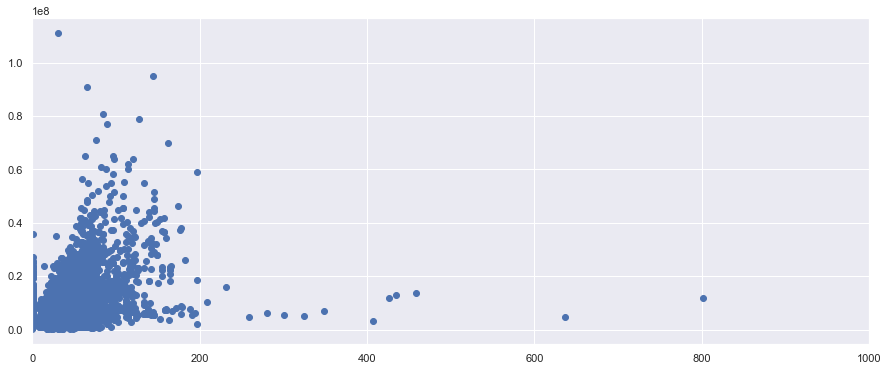

In [37]:
plt.figure(figsize= (15,6))
plt.scatter(x = data.life_sq, y = data.price_doc)
plt.xlim(0, 1000)
plt.show()

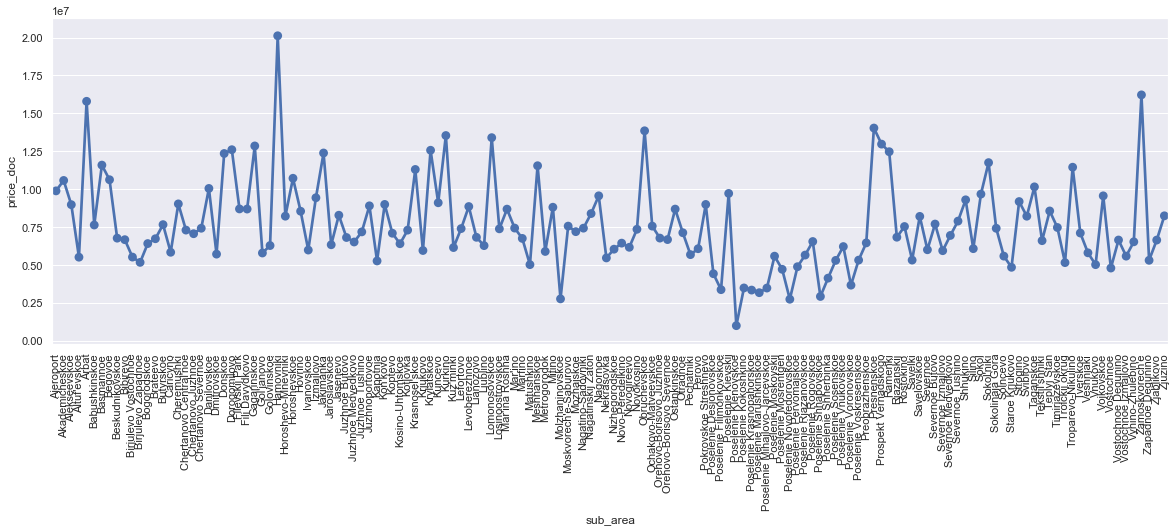

In [38]:
sub_area_price_area = data.groupby("sub_area")["price_doc"].mean().reset_index()
plt.figure(figsize= (20,6))
sns.pointplot(x = sub_area_price_area.sub_area, y= sub_area_price_area.price_doc)
plt.xticks(rotation = 90)
plt.show()

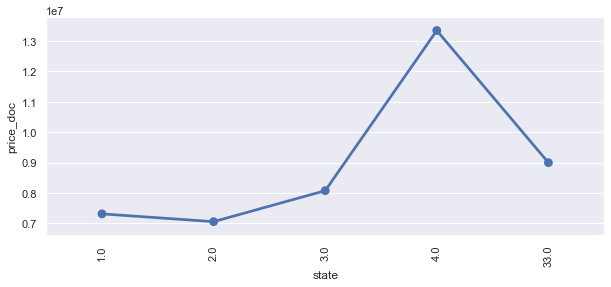

In [39]:
state_price = data.groupby("state")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,4))
sns.pointplot(x = state_price.state, y= state_price.price_doc)
plt.xticks(rotation = 90)
plt.show()

    State 4 has large mean than other State

In [40]:
data["state"].value_counts()

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

In [41]:
data[data['state'] == 33]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,month,year
10089,10092,2013-08-27,37,16.0,8.0,12.0,1.0,20052009.0,1.0,9.0,...,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3,8,2013


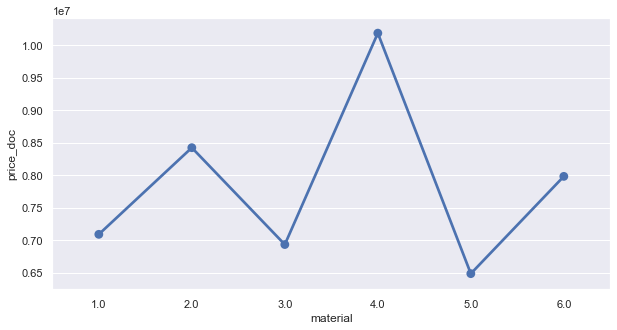

In [42]:
material_price = data.groupby("material")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,5))
sns.pointplot(x = material_price.material, y= material_price.price_doc)
#plt.xticks(rotation = 180)
plt.show()

    Material 4 has high mean than other Materials

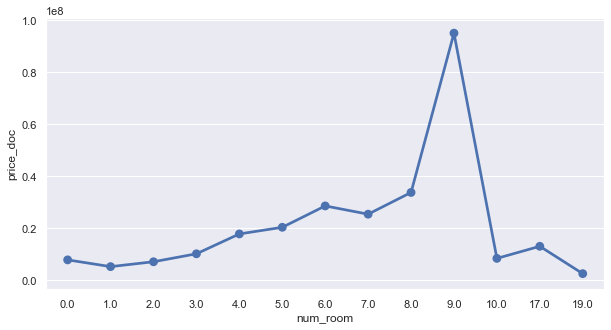

In [43]:
room_price = data.groupby("num_room")["price_doc"].mean().reset_index()
plt.figure(figsize= (10,5))
sns.pointplot(x = room_price.num_room, y= room_price.price_doc)
plt.show()

    Num of Room no 9 has great price mean than other num of room